In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("House Price India.csv")
print('Number of rows and columns:',df.shape)
df.head(5)

Number of rows and columns: (14619, 23)


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [14]:
stats=df['Price'].describe().reset_index()
stats['Price'] = round(stats['Price'],2)

In [15]:
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [6]:
df.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [16]:
df.duplicated().sum()

0

In [17]:
df.dropna(inplace=True)

In [18]:
df.drop_duplicates(inplace=True)

In [10]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [19]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


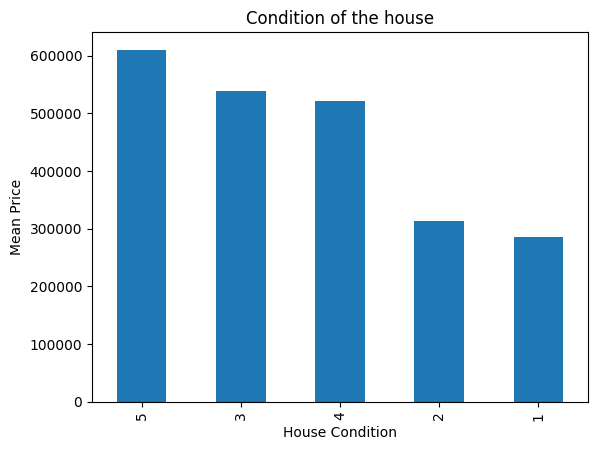

In [22]:
df.groupby('condition of the house')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Condition of the house')
plt.xlabel('House Condition')
plt.ylabel('Mean Price')
plt.show()

In [23]:
df[['number of bedrooms','number of bathrooms']]

,number of bedrooms,number of bathrooms
0,4,2.50
1,5,2.75
2,4,2.50
3,3,2.00
4,3,2.50
...,...,...
14614,2,1.50
14615,3,2.00
14616,2,1.00
14617,4,1.00


In [25]:
X = df[['number of bedrooms','number of bathrooms','living area','condition of the house','Number of schools nearby']]
y= df[['Price']]

In [26]:
X

,number of bedrooms,number of bathrooms,living area,condition of the house,Number of schools nearby
0,4,2.50,2920,5,2
1,5,2.75,2910,3,1
2,4,2.50,3310,3,3
3,3,2.00,2710,4,1
4,3,2.50,2600,4,1
...,...,...,...,...,...
14614,2,1.50,1556,4,3
14615,3,2.00,1680,4,3
14616,2,1.00,1070,3,2
14617,4,1.00,1030,4,3


In [27]:
y

,Price
0,1400000
1,1200000
2,838000
3,805000
4,790000
...,...
14614,221700
14615,219200
14616,209000
14617,205000


In [32]:
df.shape[0] * 0.8

11695.2

In [33]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape


(11695, 5)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={
    'criterion': ['mse','friedman_mse','mae'],
    'splitter': ['best','random'],
    'max_depth': [None, 10,20,30,40,50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}



In [37]:
tree_model = DecisionTreeRegressor()
grid_tree= GridSearchCV(estimator= tree_model, param_grid=param_grid)
grid_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [38]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [40]:
tree_preds=grid_tree.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_test,tree_preds)

64480776112.06215

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
predlr= lr.predict(X_test)

In [45]:
mean_squared_error(y_test, predlr)

65514176740.267784

In [47]:
mean_absolute_error(y_test, predlr)

165026.2962930765

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()

In [51]:
param_gridrfr={
    'max_depth':[5,10,15],
    'n_estimators':[2,3,4,5,6,7,8,9,10,11,12,13]
}

gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [52]:
gridrfr.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13]})

In [53]:
rfrpredictions = gridrfr.predict(X_test)

In [54]:
mean_absolute_error(y_test,rfrpredictions)

158390.1628844728

In [55]:
import joblib
joblib.dump(gridrfr,'model.pkl')

['model.pkl']

In [56]:
X.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area',
       'condition of the house', 'Number of schools nearby'],
      dtype='object')